In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Enable inline plotting
%matplotlib inline

#test_file = '/home/tungvs/work/code/jupyter/blackfriday/test/test.csv'

total_train_file = '/home/tungvs/work/code/jupyter/blackfriday/train/train.csv'
total_train_df = pd.read_csv(total_train_file)

#PREPROCESS THE DATA

# Fill the NAs
total_train_df['Product_Category_2'].fillna(-1, inplace=True)
total_train_df['Product_Category_3'].fillna(-1, inplace=True)

# Convert data types
train_df['Occupation'] = pd.to_numeric(train_df['Occupation'], downcast='integer')
train_df['Marital_Status'] = pd.to_numeric(train_df['Marital_Status'], downcast='integer')
train_df['Product_Category_1'] = pd.to_numeric(train_df['Product_Category_1'], downcast='integer')
train_df['Product_Category_2'] = pd.to_numeric(train_df['Product_Category_2'], downcast='integer')
train_df['Product_Category_3'] = pd.to_numeric(train_df['Product_Category_3'], downcast='integer')

train_df.info()

# 


train_df, test_df = 


train_df.info()

test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    

In [23]:




train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    

In [33]:
regr = linear_model.LinearRegression()

# Select the train /test data features, left the User_ID, Product_ID and Purchase out
train_df_x = train_df.iloc[:, 2:len(train_df.columns) - 1]
test_df_x = test_df.iloc[:, 2:len(train_df.columns) - 1]

# Select the train data target variable aka Purchase
train_df_y = train_df.loc[:, ['Purchase']]

train_df_x.head(5)
train_df_y.head(5)
test_df_x.head(5)

# Train the model using the training sets
regr.fit(train_df_x, train_df_y)

# Make predictions using the testing set
test_df_y_pred = regr.predict(test_df_x)


# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
#print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
#print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))





#print('\nUser count: ' + str(len(train_df['User_ID'].unique())))
#print('\nProduct count: ' + str(len(train_df['Product_ID'].unique())))

#prd_per_user_df = pd.DataFrame(train_df.groupby('User_ID')['Product_ID'].size()) \
#                    .rename(columns={'Product_ID':'Product_Count'})

#prd_per_user_df.head(10)

#sns.countplot(data=, x=)

ValueError: could not convert string to float: 'F'

User info
    + User_ID
    + Gender => category: M, F
    + Age => category (bins)
    + Occupation => category: 0 to 20 (inclusive)
    + City_Category => category: A, B, C
    + Stay_In_Current_City_Years => category (bins)
    + Marital_Status => category: 0, 1


In [2]:
print("\nGender")
print(train_df.groupby('Gender').groups.keys())

print("\nOccupation")
print(train_df.groupby('Occupation').groups.keys())

print("\nCity_Category")
print(train_df.groupby('City_Category').groups.keys())

print("\nMarital_Status")
print(train_df.groupby('Marital_Status').groups.keys())

print("\nAge")
print(train_df.groupby('Age').groups.keys())

print("\nStay_In_Current_City_Years")
print(train_df.groupby('Stay_In_Current_City_Years').groups.keys())

train_df.describe()


Gender
dict_keys(['F', 'M'])

Occupation
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

City_Category
dict_keys(['A', 'B', 'C'])

Marital_Status
dict_keys([0, 1])

Age
dict_keys(['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'])

Stay_In_Current_City_Years
dict_keys(['0', '1', '2', '3', '4+'])


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


Item info (mainly product categories)
    + Product_ID
    + Product_Category_1 => category: 1 to 20
    + Product_Category_2 => category: 2 to 18
    + Product_Category_3 => category: 3 to 18


In [3]:
print("\nProduct_Category_1")
print(train_df.groupby('Product_Category_1').groups.keys())

print("\nProduct_Category_2")
print(train_df.groupby('Product_Category_2').groups.keys())

print("\nProduct_Category_3")
print(train_df.groupby('Product_Category_3').groups.keys())


Product_Category_1
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

Product_Category_2
dict_keys([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0])

Product_Category_3
dict_keys([3.0, 4.0, 5.0, 6.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0])


Target variable:
    + Purchase

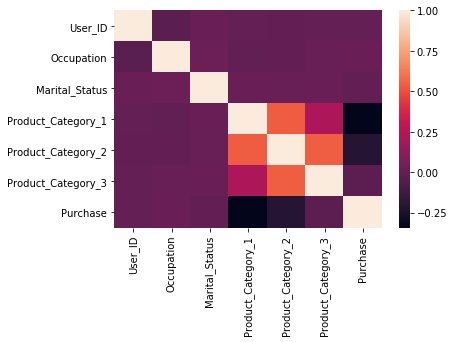

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
